### Car Price Prediction

#### Data Cleaning & Preprocessing (1–15)


In [467]:
#Load dataset and explain what each column means
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\ADEN\Desktop\DATA SCIENCE\Projects\cardekho.csv")
df.index = range(1, len(df) + 1) #to index it to start from 1 instead of 0
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
1,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
3,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
4,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
5,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [468]:
print(df.columns.tolist()) #checking the column names in a list


['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']


#### What each column means in my own words.

###### The name in this dataset is the type of the car, year means the production period, selling_price is the price at which the car was sold, km_driven is the distance covered by the car in kilometers,fuel is the type of fuel the car uses, seller's_type is the possession of the car before being sold or who is selling the car, transmission is whether the car is manual or automatic, owner is the ownership history, mileage(km/lit/kg) is how far the car can travel per unit of fuel, engine is the capacity of car's engine,max_power is the highest output of car engine's,seats are the numnber of seats inside the car.

In [469]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [470]:
df.shape

(8128, 12)

In [471]:
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [472]:
#check for missing values and percentage
print(df.isnull().sum())


name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64


In [473]:
#Print in percentage
# Percentage of missing values per column
percentage = (df.isnull().sum() / len(df)) * 100
print(percentage)

name                  0.000000
year                  0.000000
selling_price         0.000000
km_driven             0.000000
fuel                  0.000000
seller_type           0.000000
transmission          0.000000
owner                 0.000000
mileage(km/ltr/kg)    2.718996
engine                2.718996
max_power             2.645177
seats                 2.718996
dtype: float64


In [474]:
print(df.columns.tolist())


['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']


In [475]:
# Drop rows where Selling Price is missing
df = df.dropna(subset=['selling_price'])


In [476]:
df.shape

(8128, 12)

#### Explain why we can’t train a model with missing target values.
###### We can’t train a model with missing target values because, in supervised learning, the target is the “answer” the model learns from.

In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 1 to 8128
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [478]:
df.shape

(8128, 12)

In [479]:
# Fill missing mileage values with the column's mean
df['mileage(km/ltr/kg)'] = df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].mean())


In [480]:
df.shape

(8128, 12)

In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 1 to 8128
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  8128 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [482]:
print(df.isnull().sum())

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)      0
engine                221
max_power             215
seats                 221
dtype: int64


#### Explain why filling missing values can sometimes be better than dropping rows.
-Dropping rows can sometimes remove useful information.

-Dropping rows can sometimes be biased since sometimes it's selective.



In [483]:
df.shape

(8128, 12)

In [484]:
#Dropping duplicates
df= df.drop_duplicates()
print(f"Remaining rows after dropping duplicates is {len(df)}")

Remaining rows after dropping duplicates is 6926


In [485]:
df.shape

(6926, 12)

#### Explain how duplicate rows can affect model training.
-By overfitting that is by memorizing these duplicates instead of learning general rules

-Processing data increases training time and memory usage withouy adding new information

In [486]:
#Convert the “year” column into the car’s age.
from datetime import datetime

# Get the current year
current_year = datetime.now().year
print(current_year)

2025


In [487]:
# Convert to car_age column from the year column
df['car_age'] = current_year - df['year']
df = df.drop(columns=['year'])


In [488]:
df.head() #Just to confirm the new car_age column

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
1,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,11
2,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
3,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,19
4,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,15
5,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,18


In [489]:
print(df.columns.tolist()) #To confirm the car_age column


['name', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats', 'car_age']


In [490]:
#Check the unique values in the “fuel type” column.
print(df['fuel'].unique())


['Diesel' 'Petrol' 'LPG' 'CNG']


####  Explain why knowing all possible values in a categorical column is important before encoding.
-This is to ensure your model gets clean and with complete information so as to avoid missing categories

-Helps detect typos

-It also improves data quality 


In [491]:
# Replace inconsistent values in the “transmission” column.
print(df['transmission'].unique())


['Manual' 'Automatic']


In [492]:
# Stripping the transmission column for consistent values
df['transmission'] = df['transmission'].str.strip().str.lower().str.title()

In [493]:
print(df['transmission'].unique())

['Manual' 'Automatic']


#### Conclusion 
-There are no inconsisntent values.

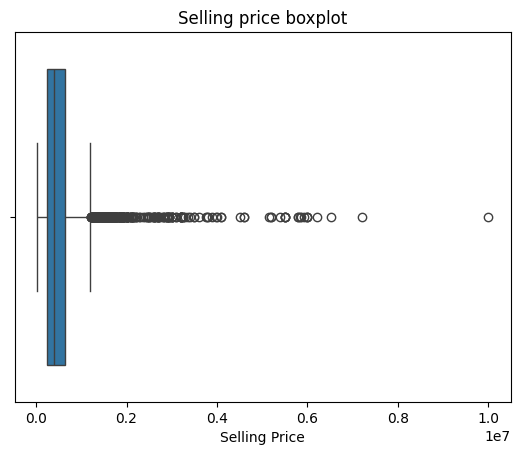

In [494]:
#Check if there are any outliers in the “selling price” column using a boxplot.
#Using seaborns boxplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['selling_price'])
plt.title('Selling price boxplot')
plt.xlabel('Selling Price')
plt.show()


#### Explain why outliers can affect model accuracy.
-It may Cause overfitting 

-Outliers have large errors that pull the regression line away from the majority of data making making predictions less accurate.

In [495]:
#Remove cars that are priced below 10,000 or above 5,000,000 (possible outliers).
df = df[(df['selling_price'] >= 10000) & (df['selling_price'] <= 5000000)] #use logical operator and
print(f"Rows after removing outliers are {len(df)}")

Rows after removing outliers are 6906


#### Explain why setting realistic price limits can help improve model performance.
-It helps prevent skewed predictions

-Reduces noise in the data by eg unrealistic prices that don't reflect general market so by setting the limit ensures the model focuses on meaningful patterns.



In [496]:
df.columns

Index(['name', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats', 'car_age'],
      dtype='object')

In [497]:
#Standardize the column names so they are all lowercase and contain underscores instead of spaces.
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [498]:
print(df.columns)

Index(['name', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats', 'car_age'],
      dtype='object')


In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6906 entries, 1 to 8126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6906 non-null   object 
 1   selling_price       6906 non-null   int64  
 2   km_driven           6906 non-null   int64  
 3   fuel                6906 non-null   object 
 4   seller_type         6906 non-null   object 
 5   transmission        6906 non-null   object 
 6   owner               6906 non-null   object 
 7   mileage(km/ltr/kg)  6906 non-null   float64
 8   engine              6698 non-null   float64
 9   max_power           6701 non-null   object 
 10  seats               6698 non-null   float64
 11  car_age             6906 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 701.4+ KB


In [500]:
df.head(5) #to study the data easily

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
1,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,11
2,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
3,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,19
4,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,15
5,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,18


In [501]:
df.dtypes

name                   object
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
car_age                 int64
dtype: object

In [502]:
#Check if any numerical columns are stored as strings and convert them to numbers.

##### From the data above, only max_power is written in an object format while it should be a float since it has decimals and has no extra texts.
##### That means we will be converting this to numeric only by itself.

In [503]:
#Converting max_power to numeric
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6906 entries, 1 to 8126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6906 non-null   object 
 1   selling_price       6906 non-null   int64  
 2   km_driven           6906 non-null   int64  
 3   fuel                6906 non-null   object 
 4   seller_type         6906 non-null   object 
 5   transmission        6906 non-null   object 
 6   owner               6906 non-null   object 
 7   mileage(km/ltr/kg)  6906 non-null   float64
 8   engine              6698 non-null   float64
 9   max_power           6700 non-null   float64
 10  seats               6698 non-null   float64
 11  car_age             6906 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 701.4+ KB


In [504]:
#confirming the max_power is in numeric format now...
df.dtypes

name                   object
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power             float64
seats                 float64
car_age                 int64
dtype: object

In [505]:
#Create a new column for “price per kilometer” by dividing the selling price by the mileage.
df['price_per_km'] = df['selling_price'] / df['mileage(km/ltr/kg)']
df.index = range(1, len(df) + 1) 
print(df.head(5)) #For a view to see if the new column is created

                           name  selling_price  km_driven    fuel seller_type  \
1        Maruti Swift Dzire VDI         450000     145500  Diesel  Individual   
2  Skoda Rapid 1.5 TDI Ambition         370000     120000  Diesel  Individual   
3      Honda City 2017-2020 EXi         158000     140000  Petrol  Individual   
4     Hyundai i20 Sportz Diesel         225000     127000  Diesel  Individual   
5        Maruti Swift VXI BSIII         130000     120000  Petrol  Individual   

  transmission         owner  mileage(km/ltr/kg)  engine  max_power  seats  \
1       Manual   First Owner               23.40  1248.0      74.00    5.0   
2       Manual  Second Owner               21.14  1498.0     103.52    5.0   
3       Manual   Third Owner               17.70  1497.0      78.00    5.0   
4       Manual   First Owner               23.00  1396.0      90.00    5.0   
5       Manual   First Owner               16.10  1298.0      88.20    5.0   

   car_age  price_per_km  
1       11  19230

In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6906 entries, 1 to 6906
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6906 non-null   object 
 1   selling_price       6906 non-null   int64  
 2   km_driven           6906 non-null   int64  
 3   fuel                6906 non-null   object 
 4   seller_type         6906 non-null   object 
 5   transmission        6906 non-null   object 
 6   owner               6906 non-null   object 
 7   mileage(km/ltr/kg)  6906 non-null   float64
 8   engine              6698 non-null   float64
 9   max_power           6700 non-null   float64
 10  seats               6698 non-null   float64
 11  car_age             6906 non-null   int64  
 12  price_per_km        6906 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 701.5+ KB


In [507]:
#but from my data we still have missing values from the engine,max_power and seats columns so instead of dropping the columns I will fill them so as not to lose a lot of data


In [508]:
print(df.head())

                           name  selling_price  km_driven    fuel seller_type  \
1        Maruti Swift Dzire VDI         450000     145500  Diesel  Individual   
2  Skoda Rapid 1.5 TDI Ambition         370000     120000  Diesel  Individual   
3      Honda City 2017-2020 EXi         158000     140000  Petrol  Individual   
4     Hyundai i20 Sportz Diesel         225000     127000  Diesel  Individual   
5        Maruti Swift VXI BSIII         130000     120000  Petrol  Individual   

  transmission         owner  mileage(km/ltr/kg)  engine  max_power  seats  \
1       Manual   First Owner               23.40  1248.0      74.00    5.0   
2       Manual  Second Owner               21.14  1498.0     103.52    5.0   
3       Manual   Third Owner               17.70  1497.0      78.00    5.0   
4       Manual   First Owner               23.00  1396.0      90.00    5.0   
5       Manual   First Owner               16.10  1298.0      88.20    5.0   

   car_age  price_per_km  
1       11  19230

In [509]:
#Using mean to fill in the engine values
df["engine"] = df["engine"].fillna(df["engine"].mean())

In [510]:
#Using mean to fill in the max_power values
df["max_power"] = df["max_power"].fillna(df["max_power"].mean()) # pyright: ignore[reportUndefinedVariable]

In [511]:
#Using mode to fill in the seats values since it is a discrete numeric
df["seats"] = df["seats"].fillna(df["seats"].mode()[0])

In [512]:
df.info() # data with no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6906 entries, 1 to 6906
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6906 non-null   object 
 1   selling_price       6906 non-null   int64  
 2   km_driven           6906 non-null   int64  
 3   fuel                6906 non-null   object 
 4   seller_type         6906 non-null   object 
 5   transmission        6906 non-null   object 
 6   owner               6906 non-null   object 
 7   mileage(km/ltr/kg)  6906 non-null   float64
 8   engine              6906 non-null   float64
 9   max_power           6906 non-null   float64
 10  seats               6906 non-null   float64
 11  car_age             6906 non-null   int64  
 12  price_per_km        6906 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 701.5+ KB


In [513]:
#Ensure the dataset index is properly reset after cleaning.
df.reset_index(drop=True, inplace=True) 
df.index = range(1, len(df) + 1)
print(df.head(5)) 

                           name  selling_price  km_driven    fuel seller_type  \
1        Maruti Swift Dzire VDI         450000     145500  Diesel  Individual   
2  Skoda Rapid 1.5 TDI Ambition         370000     120000  Diesel  Individual   
3      Honda City 2017-2020 EXi         158000     140000  Petrol  Individual   
4     Hyundai i20 Sportz Diesel         225000     127000  Diesel  Individual   
5        Maruti Swift VXI BSIII         130000     120000  Petrol  Individual   

  transmission         owner  mileage(km/ltr/kg)  engine  max_power  seats  \
1       Manual   First Owner               23.40  1248.0      74.00    5.0   
2       Manual  Second Owner               21.14  1498.0     103.52    5.0   
3       Manual   Third Owner               17.70  1497.0      78.00    5.0   
4       Manual   First Owner               23.00  1396.0      90.00    5.0   
5       Manual   First Owner               16.10  1298.0      88.20    5.0   

   car_age  price_per_km  
1       11  19230

In [514]:
#Save the new cleaned dataset
df.to_csv("cleaned_cars.csv")


#### Exploratory Data Analysis[EDA] (Question 16-30)

In [515]:
df.head(20)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,price_per_km
1,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248.000000,74.000000,5.0,11,19230.769231
2,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.140000,1498.000000,103.520000,5.0,11,17502.365184
3,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.700000,1497.000000,78.000000,5.0,19,8926.553672
4,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396.000000,90.000000,5.0,15,9782.608696
5,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298.000000,88.200000,5.0,18,8074.534161
6,Hyundai Xcent 1.2 VTVT E Plus,440000,45000,Petrol,Individual,Manual,First Owner,20.140000,1197.000000,81.860000,5.0,8,21847.070506
7,Maruti Wagon R LXI DUO BSIII,96000,175000,LPG,Individual,Manual,First Owner,17.300000,1061.000000,57.500000,5.0,18,5549.132948
8,Maruti 800 DX BSII,45000,5000,Petrol,Individual,Manual,Second Owner,16.100000,796.000000,37.000000,4.0,24,2795.031056
9,Toyota Etios VXD,350000,90000,Diesel,Individual,Manual,First Owner,23.590000,1364.000000,67.100000,5.0,14,14836.795252
10,Ford Figo Diesel Celebration Edition,200000,169000,Diesel,Individual,Manual,First Owner,20.000000,1399.000000,68.100000,5.0,12,10000.000000


In [516]:
#Finding the average selling price in the dataset using numpy
import numpy as np
avg_sell = np.median(df['selling_price'])
print(f"average using median would be {avg_sell}")

average using median would be 400000.0


In [517]:
avg_sell = np.mean(df['selling_price'])
print(f"average using mean would be, {avg_sell:.2f}")

average using mean would be, 501378.18


In [518]:
#Find the average selling price of cars in the dataset.
average_price = df["selling_price"].median() #we are using median since our data is not symmetric
print(f"The average selling price is {average_price:.2f}") #.2f for two decimal places


The average selling price is 400000.00


In [519]:
df.shape

(6906, 13)

In [520]:
#Find the most common fuel type in the dataset.
#look at it's shape first to confirm there are no missing values first
column_shape = df['fuel'].shape
print(column_shape)

(6906,)


In [521]:
#finding the most common fuel types in my fuel column
print(df['fuel'].value_counts())


fuel
Diesel    3741
Petrol    3071
CNG         56
LPG         38
Name: count, dtype: int64


###### The most commonly used fuel type would be diesel with 3741 users.

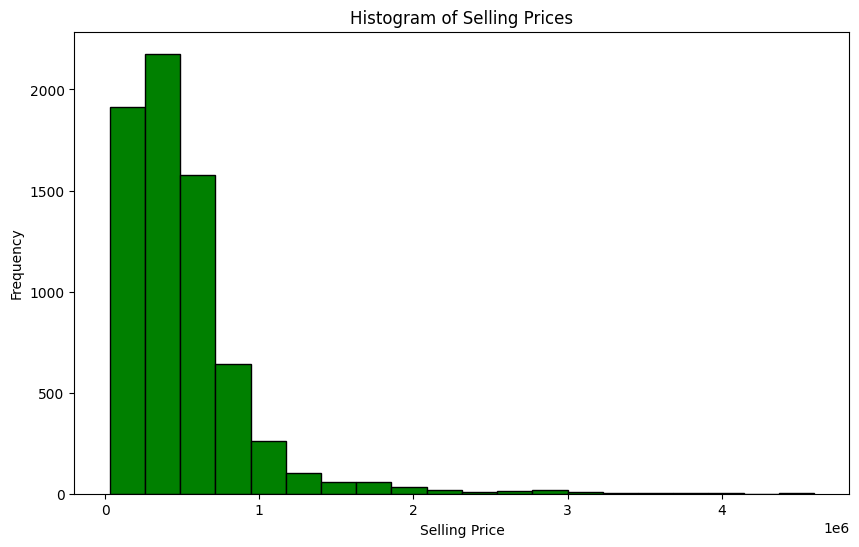

In [522]:
#Plot a histogram of the selling prices.
plt.figure(figsize=(10, 6))
plt.hist(df['selling_price'], bins=20, color='green',edgecolor = 'black') 
plt.title('Histogram of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

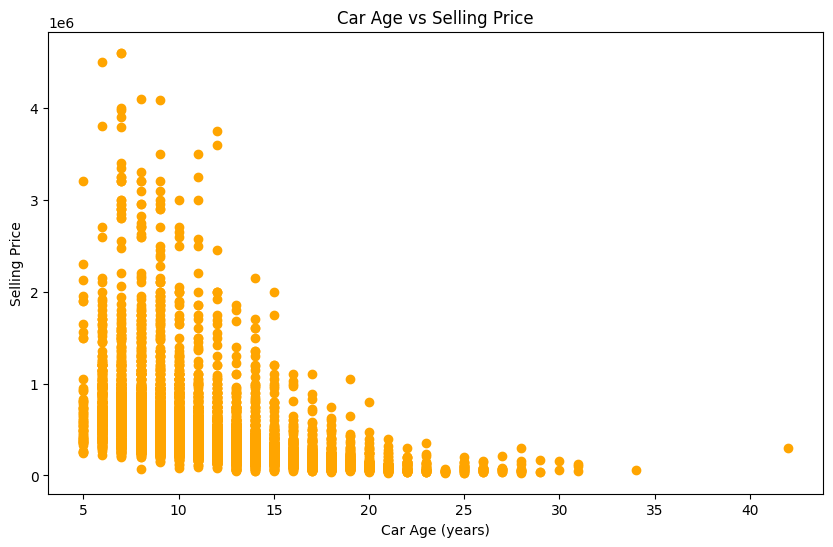

In [523]:
#Plot the relationship between car age and selling price using a scatter plot.
plt.figure(figsize=(10, 6))
plt.scatter(df['car_age'], df['selling_price'], color='orange')
plt.title('Car Age vs Selling Price')
plt.xlabel('Car Age (years)')
plt.ylabel('Selling Price')
plt.show()

In [524]:
df.head(5)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,price_per_km
1,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11,19230.769231
2,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11,17502.365184
3,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19,8926.553672
4,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15,9782.608696
5,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18,8074.534161


In [525]:
#Group cars by fuel type and find the average selling price for each group.
#Here, we'll use the groupby method and the median.
avg_price_by_fuel = df.groupby('fuel')['selling_price'].median()

print(avg_price_by_fuel)


fuel
CNG       320000.0
Diesel    520000.0
LPG       195500.0
Petrol    310000.0
Name: selling_price, dtype: float64


###### From the output, diesel cars have the highest average selling price

In [526]:
#Extra
#sorting from the highest
print(avg_price_by_fuel.sort_values(ascending = False))#to view from lowest just remove the ascending

fuel
Diesel    520000.0
CNG       320000.0
Petrol    310000.0
LPG       195500.0
Name: selling_price, dtype: float64


In [527]:
#Plot a bar chart showing the number of cars per transmission type
import matplotlib.pyplot as plt
#Using count to see the values in the transmission column
trans_counts = df['transmission'].value_counts()
print(trans_counts)

transmission
Manual       6342
Automatic     564
Name: count, dtype: int64


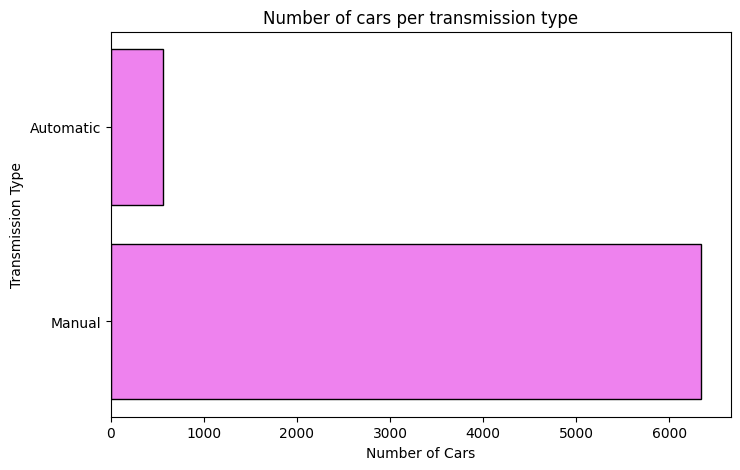

In [528]:
#Plotting the number of cars per transmission type
plt.figure(figsize=(8, 5))
plt.barh(trans_counts.index, trans_counts.values, color='violet', edgecolor='black') #Using barh to view it horizontally
plt.title('Number of cars per transmission type')
plt.xlabel('Number of Cars')
plt.ylabel('Transmission Type')
plt.show()

In [529]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6906 entries, 1 to 6906
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6906 non-null   object 
 1   selling_price       6906 non-null   int64  
 2   km_driven           6906 non-null   int64  
 3   fuel                6906 non-null   object 
 4   seller_type         6906 non-null   object 
 5   transmission        6906 non-null   object 
 6   owner               6906 non-null   object 
 7   mileage(km/ltr/kg)  6906 non-null   float64
 8   engine              6906 non-null   float64
 9   max_power           6906 non-null   float64
 10  seats               6906 non-null   float64
 11  car_age             6906 non-null   int64  
 12  price_per_km        6906 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 701.5+ KB


In [530]:
max_mileage = df['mileage(km/ltr/kg)'].idxmax()
print(max_mileage)

36


In [531]:
row_values = df.loc[36] #.loc[] looks for index name/label
print(row_values)

name                  Maruti Alto 800 CNG LXI Optional
selling_price                                   330000
km_driven                                        10000
fuel                                               CNG
seller_type                                 Individual
transmission                                    Manual
owner                                     Second Owner
mileage(km/ltr/kg)                               33.44
engine                                           796.0
max_power                                         40.3
seats                                              4.0
car_age                                              6
price_per_km                               9868.421053
Name: 36, dtype: object


In [532]:
#Another way and also the fastest way
#Find the row with the maximum mileage
max_mileage_row = df.loc[df['mileage(km/ltr/kg)'].idxmax()]
print(max_mileage_row)

name                  Maruti Alto 800 CNG LXI Optional
selling_price                                   330000
km_driven                                        10000
fuel                                               CNG
seller_type                                 Individual
transmission                                    Manual
owner                                     Second Owner
mileage(km/ltr/kg)                               33.44
engine                                           796.0
max_power                                         40.3
seats                                              4.0
car_age                                              6
price_per_km                               9868.421053
Name: 36, dtype: object


In [533]:
#Find the car with the highest mileage in the dataset with the columns you want code
max_mileage = df.loc[df['mileage(km/ltr/kg)'].idxmax()]
print(max_mileage)

name                  Maruti Alto 800 CNG LXI Optional
selling_price                                   330000
km_driven                                        10000
fuel                                               CNG
seller_type                                 Individual
transmission                                    Manual
owner                                     Second Owner
mileage(km/ltr/kg)                               33.44
engine                                           796.0
max_power                                         40.3
seats                                              4.0
car_age                                              6
price_per_km                               9868.421053
Name: 36, dtype: object


In [534]:
print(max_mileage[['selling_price', 'mileage(km/ltr/kg)', 'fuel', 'transmission']]) #division to what I want.

selling_price         330000
mileage(km/ltr/kg)     33.44
fuel                     CNG
transmission          Manual
Name: 36, dtype: object


In [535]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6906 entries, 1 to 6906
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6906 non-null   object 
 1   selling_price       6906 non-null   int64  
 2   km_driven           6906 non-null   int64  
 3   fuel                6906 non-null   object 
 4   seller_type         6906 non-null   object 
 5   transmission        6906 non-null   object 
 6   owner               6906 non-null   object 
 7   mileage(km/ltr/kg)  6906 non-null   float64
 8   engine              6906 non-null   float64
 9   max_power           6906 non-null   float64
 10  seats               6906 non-null   float64
 11  car_age             6906 non-null   int64  
 12  price_per_km        6906 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 701.5+ KB


In [536]:
#Calculate the correlation between Mileage and selling price
#correlation only works with numeri data
correlation = df['mileage(km/ltr/kg)'].corr(df['selling_price'])
print(correlation)

-0.12069849273188767


In [537]:
df.columns.tolist()

['name',
 'selling_price',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'mileage(km/ltr/kg)',
 'engine',
 'max_power',
 'seats',
 'car_age',
 'price_per_km']

In [538]:
#using pearson method
df.corr(method='pearson', numeric_only=True) #when data is normally distributed and numeric
#from the output below you can tell the only calculated correlations are the one that are either floats or int
#pearson calculates how strong the linear relationship

,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,car_age,price_per_km
selling_price,1.000000,-0.169558,-0.120698,0.472129,0.685662,0.223538,-0.485645,0.947991
km_driven,-0.169558,1.000000,-0.197088,0.257527,0.054506,0.200104,0.374980,-0.097405
mileage(km/ltr/kg),-0.120698,-0.197088,1.000000,-0.580945,-0.390528,-0.460085,-0.350169,-0.339874
engine,0.472129,0.257527,-0.580945,1.000000,0.683249,0.664530,0.024388,0.580001
max_power,0.685662,0.054506,-0.390528,0.683249,1.000000,0.277050,-0.140352,0.724617
seats,0.223538,0.200104,-0.460085,0.664530,0.277050,1.000000,-0.044313,0.320137
car_age,-0.485645,0.374980,-0.350169,0.024388,-0.140352,-0.044313,1.000000,-0.345434
price_per_km,0.947991,-0.097405,-0.339874,0.580001,0.724617,0.320137,-0.345434,1.000000


In [539]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6906 entries, 1 to 6906
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6906 non-null   object 
 1   selling_price       6906 non-null   int64  
 2   km_driven           6906 non-null   int64  
 3   fuel                6906 non-null   object 
 4   seller_type         6906 non-null   object 
 5   transmission        6906 non-null   object 
 6   owner               6906 non-null   object 
 7   mileage(km/ltr/kg)  6906 non-null   float64
 8   engine              6906 non-null   float64
 9   max_power           6906 non-null   float64
 10  seats               6906 non-null   float64
 11  car_age             6906 non-null   int64  
 12  price_per_km        6906 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 701.5+ KB


In [540]:
#Plot a heatmap showing the correlations between all numeric columns
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numeric_df = df.select_dtypes(include='number')


In [541]:
# correlation matrix
corr_matrix = numeric_df.corr()

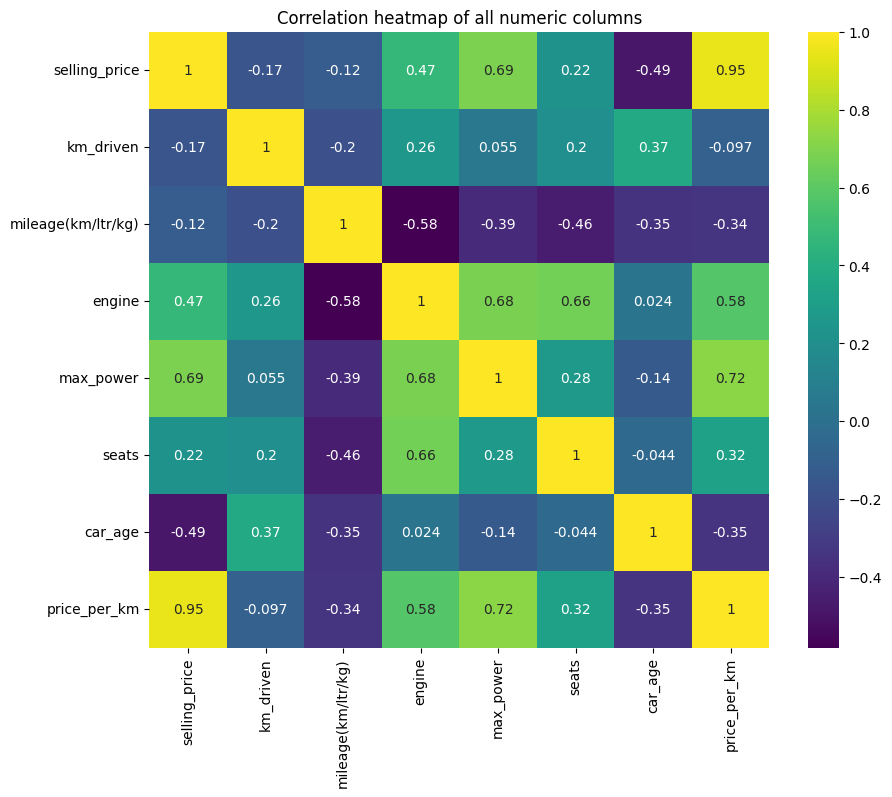

In [542]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="viridis")
plt.title("Correlation heatmap of all numeric columns")
plt.show()

In [543]:
df.dtypes

name                   object
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power             float64
seats                 float64
car_age                 int64
price_per_km          float64
dtype: object

In [544]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,price_per_km
1,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11,19230.769231
2,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11,17502.365184
3,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19,8926.553672
4,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15,9782.608696
5,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18,8074.534161


In [545]:
#Check if manual cars are generally cheaper or more expensive than automatic cars.
manual_avg_price = df[df['transmission'] == 'Manual']['selling_price'].mean()
print(f"Manual = {manual_avg_price}")


Manual = 444299.07489750866


In [546]:
manual_median = df[df['transmission'] == 'Manual']['selling_price'].median()
print(manual_median)

385000.0


In [547]:
automatic_avg_price = df[df['transmission'] == 'Automatic']['selling_price'].mean() 
print(f"Automatic = {automatic_avg_price}")

Automatic = 1143214.5141843972


In [548]:
auto_median = df[df['transmission'] == 'Automatic']['selling_price'].median()
print(auto_median)

800000.0


###### Preferably use median here...

#### Conclusion would be manual cars are cheaper compared to the automatic ones.

In [549]:
#Find the average selling price for each year of manufacture.

In [550]:
avg_price = df.groupby("car_age")["selling_price"].mean().reset_index()
print(avg_price)

    car_age  selling_price
0         5  786548.338710
1         6  795583.291667
2         7  825749.553897
3         8  708006.173913
4         9  653180.339105
5        10  589177.625551
6        11  511858.798623
7        12  451501.724199
8        13  351387.379139
9        14  318335.696751
10       15  273897.334211
11       16  227691.620833
12       17  208397.639024
13       18  174894.505682
14       19  164383.308943
15       20  137994.494505
16       21  109364.250000
17       22   97034.021277
18       23   99153.807692
19       24   47220.333333
20       25   90047.850000
21       26   71470.588235
22       27   73100.000000
23       28   90181.727273
24       29   81666.666667
25       30  107500.000000
26       31   88000.000000
27       34   55000.000000
28       42  300000.000000


In [551]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6906 entries, 1 to 6906
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6906 non-null   object 
 1   selling_price       6906 non-null   int64  
 2   km_driven           6906 non-null   int64  
 3   fuel                6906 non-null   object 
 4   seller_type         6906 non-null   object 
 5   transmission        6906 non-null   object 
 6   owner               6906 non-null   object 
 7   mileage(km/ltr/kg)  6906 non-null   float64
 8   engine              6906 non-null   float64
 9   max_power           6906 non-null   float64
 10  seats               6906 non-null   float64
 11  car_age             6906 non-null   int64  
 12  price_per_km        6906 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 701.5+ KB


In [552]:
df.head(5)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,price_per_km
1,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11,19230.769231
2,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11,17502.365184
3,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19,8926.553672
4,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15,9782.608696
5,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18,8074.534161


In [553]:
#Find the average selling price of cars in the dataset
avg_price = df['selling_price'].median()
print(f"The average selling price would be {avg_price}")


The average selling price would be 400000.0


In [554]:
# Average selling price per car_age
avg_pricee = df.groupby("car_age")["selling_price"].median().reset_index()

print(avg_pricee.head())


   car_age  selling_price
0        5       590000.0
1        6       683000.0
2        7       700000.0
3        8       625000.0
4        9       550000.0


In [555]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6906 entries, 1 to 6906
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6906 non-null   object 
 1   selling_price       6906 non-null   int64  
 2   km_driven           6906 non-null   int64  
 3   fuel                6906 non-null   object 
 4   seller_type         6906 non-null   object 
 5   transmission        6906 non-null   object 
 6   owner               6906 non-null   object 
 7   mileage(km/ltr/kg)  6906 non-null   float64
 8   engine              6906 non-null   float64
 9   max_power           6906 non-null   float64
 10  seats               6906 non-null   float64
 11  car_age             6906 non-null   int64  
 12  price_per_km        6906 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 701.5+ KB


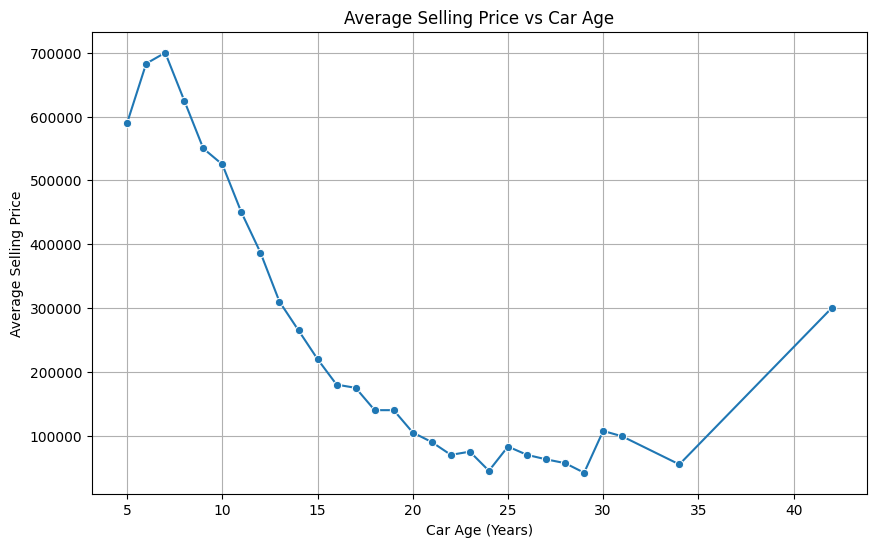

In [556]:
#Plot a line chart showing the trend of selling prices over the years.
# Plot line chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_pricee, x="car_age", y="selling_price", marker="o")
plt.title("Average Selling Price vs Car Age")
plt.xlabel("Car Age (Years)")
plt.ylabel("Average Selling Price")
plt.grid(True)
plt.show()

In [557]:
#Find the most expensive car for each fuel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6906 entries, 1 to 6906
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6906 non-null   object 
 1   selling_price       6906 non-null   int64  
 2   km_driven           6906 non-null   int64  
 3   fuel                6906 non-null   object 
 4   seller_type         6906 non-null   object 
 5   transmission        6906 non-null   object 
 6   owner               6906 non-null   object 
 7   mileage(km/ltr/kg)  6906 non-null   float64
 8   engine              6906 non-null   float64
 9   max_power           6906 non-null   float64
 10  seats               6906 non-null   float64
 11  car_age             6906 non-null   int64  
 12  price_per_km        6906 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 701.5+ KB


In [558]:
#Find the most expensive car for each fuel
#Check for the values in fuel column first
print(df['fuel'].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']


In [559]:
#The most expensive car for each fuel
expensive = df.groupby('fuel')['selling_price'].idxmax()
print(expensive)

fuel
CNG       4962
Diesel     284
LPG       2784
Petrol     134
Name: selling_price, dtype: int64


In [560]:
expensive_fuel = df.loc[expensive]
print(expensive_fuel)

                                          name  selling_price  km_driven  \
4962     Maruti Ertiga VXI CNG Limited Edition         545000      35000   
284   Mercedes-Benz GL-Class 220d 4MATIC Sport        4600000       7976   
2784               Hyundai i10 Sportz 1.1L LPG         375000      60000   
134            Jeep Wrangler 2016-2019 3.6 4X4        4100000      17000   

        fuel seller_type transmission        owner  mileage(km/ltr/kg)  \
4962     CNG  Individual       Manual  First Owner                22.8   
284   Diesel  Individual    Automatic  First Owner                17.9   
2784     LPG  Individual       Manual  First Owner                19.2   
134   Petrol  Individual    Automatic  First Owner                 9.5   

      engine  max_power  seats  car_age   price_per_km  
4962  1373.0      80.90    7.0       11   23903.508772  
284   2143.0     170.00    5.0        7  256983.240223  
2784  1086.0      68.05    5.0       10   19531.250000  
134   3604.0     280

In [561]:
#QUESTION 29
#Find out which brand appears most frequently in the dataset
df['brand'] = df['name'].str.split().str[0]  # Extract brand
most_common_brand = df['brand'].mode()[0]
print(most_common_brand)


Maruti


In [562]:
#How many times it appears
brand_count = df['brand'].value_counts().iloc[0]
print(brand_count)


2165


In [564]:
#count brands with how the appeared
brand_count = df['brand'].value_counts().head(5)
print(brand_count)

brand
Maruti      2165
Hyundai     1267
Mahindra     723
Tata         647
Honda        362
Name: count, dtype: int64


In [568]:
#QUESTION 30
#Check the top 5 most common combinations of fuel type and transmission.
top_5_combinations = (df.groupby(['fuel', 'transmission']).size().reset_index(name='count').sort_values(by='count', ascending=False).head(5))
top_5_combinations.index = range(1, len(top_5_combinations) + 1)
print(top_5_combinations)



     fuel transmission  count
1  Diesel       Manual   3457
2  Petrol       Manual   2791
3  Diesel    Automatic    284
4  Petrol    Automatic    280
5     CNG       Manual     56


#### Machine Learning (31–40)

31. #### What are the main assumptions of Linear Regression, and how can you check them using this dataset?
-Explain the assumptions (Linearity, Homoscedasticity, Normality of residuals, No multicollinearity, Independence of errors).

##### Assumptions in "L.I.N.H.M" → Linearity, Independence, Normality, Homoscedasticity, Multicollinearity.
#### Linearity
-It means the relationship between input/predictors(x) and the output/target(y) is in a straight-line(linear)  and it matters if the true relationship is curved that would mean your predictions would be off.

#### Homoscedasticity
-The observational errors here have constant variance. If variance changes , predictions are biased for some ranges.

#### Normality of Residuals
-Residuals are normally distributed. They are needed for accurate confidence intervals & hypothesis test.

#### No multicollinearity
-Inputs should not be highly correlated because it may make coefficients to be unstable that is corrrelation between X's.

#### Independence
-Here the Observations are independent meaning no patterns or chain reactions.

#### Then, write code to verify at least three of these assumptions using visualizations or statistics.

In [ ]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats


In [ ]:
df = pd.read_csv("cleaned_cars.csv")
df.index = range(1, len(df) + 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6906 entries, 1 to 6906
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          6906 non-null   int64  
 1   name                6906 non-null   object 
 2   selling_price       6906 non-null   int64  
 3   km_driven           6906 non-null   int64  
 4   fuel                6906 non-null   object 
 5   seller_type         6906 non-null   object 
 6   transmission        6906 non-null   object 
 7   owner               6906 non-null   object 
 8   mileage(km/ltr/kg)  6906 non-null   float64
 9   engine              6906 non-null   float64
 10  max_power           6906 non-null   float64
 11  seats               6906 non-null   float64
 12  car_age             6906 non-null   int64  
 13  price_per_km        6906 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 755.5+ KB


In [ ]:
#Feature selection and Target selection
X = df[['car_age', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']]
y = df['selling_price']

In [ ]:
#Fitting the model
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
#View coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-42405.50853768   1810.30493034    117.79545937   7739.42040999
 -12488.30583685]
Intercept: 181616.47931347578


In [ ]:
#code of at least 3 assumptions
#Linearity
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


In [ ]:
print(df.columns.tolist())


['Unnamed: 0', 'name', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats', 'car_age', 'price_per_km']


In [ ]:
df.head(5)

,Unnamed: 0,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,price_per_km
1,1,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11,19230.769231
2,2,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11,17502.365184
3,3,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19,8926.553672
4,4,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15,9782.608696
5,5,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18,8074.534161


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
X = df[['engine']] 
y = df['selling_price']

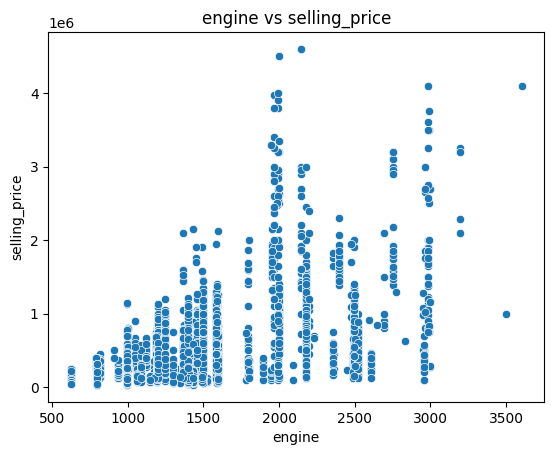

In [ ]:
sns.scatterplot(x=X['engine'], y=y)
plt.title('engine vs selling_price')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Fit model
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Predict y values for the line
y_pred = model.predict(X)
residuals = y - y_pred

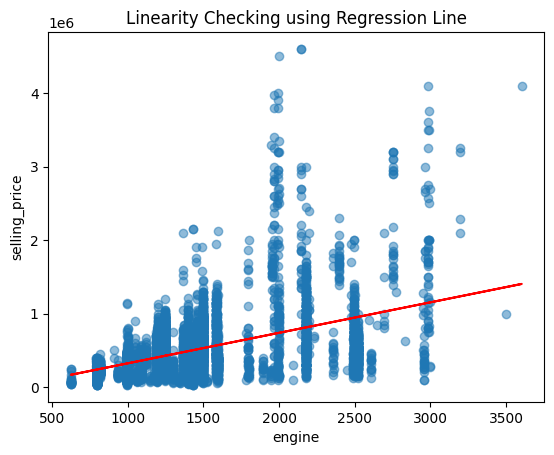

In [ ]:
# Plot scatter and line
plt.scatter(X, y, alpha=0.5)
plt.plot(X, y_pred, color='red')
plt.title('Linearity Checking using Regression Line')
plt.xlabel('engine')
plt.ylabel('selling_price')
plt.show()

In [ ]:
#Using No multicolliniearity
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
#Using Normality of Errors
#showing residuals are normally distributed
model = LinearRegression()
model.fit(X, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
#Predicting
y_pred = model.predict(X)
residuals = y - y_pred

In [ ]:
print(residuals)

1        23346.755400
2      -160326.864921
3      -371912.170440
4      -263028.027830
5      -317387.968664
            ...      
6902    -62979.624279
6903    -13028.027830
6904    -85503.826055
6905   -393253.392515
6906    -44653.244600
Name: selling_price, Length: 6906, dtype: float64


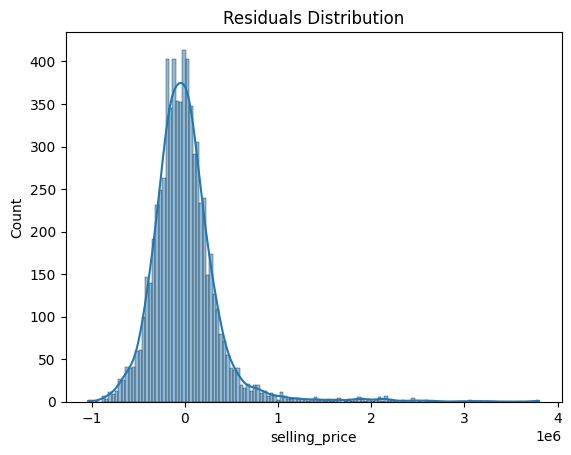

In [ ]:
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

In [ ]:
import numpy as np
z_scores = (residuals - residuals.mean()) / residuals.std()
outliers = residuals[np.abs(z_scores) > 3]
print(outliers)


42      1.623583e+06
83      1.762326e+06
132     3.249767e+06
133     2.461911e+06
134     2.696327e+06
            ...     
6559    2.148402e+06
6642    1.253195e+06
6653    1.427193e+06
6728    2.074767e+06
6736    1.279387e+06
Name: selling_price, Length: 104, dtype: float64


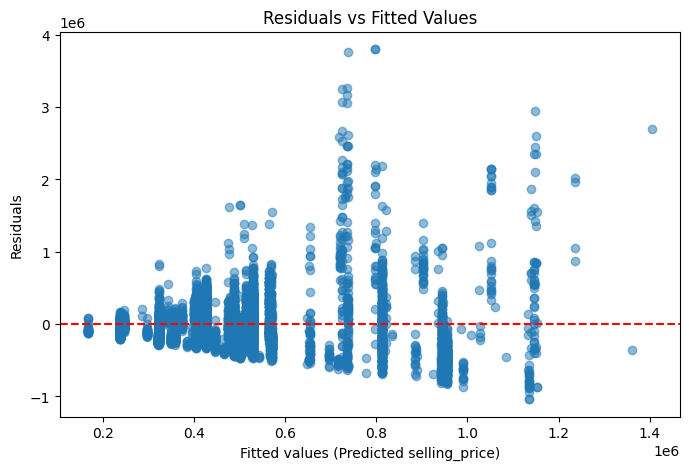

In [ ]:
#Homoscedasticity assumption (constant variance of residuals)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted values (Predicted selling_price)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()


#### This means variance increased with the predicted price

#### Q32


###### Train a Linear Regression model to predict the car’s selling price using selected features.
###### Split the dataset into train/test sets, train the model, and print the coefficients and intercept.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6906 entries, 1 to 6906
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          6906 non-null   int64  
 1   name                6906 non-null   object 
 2   selling_price       6906 non-null   int64  
 3   km_driven           6906 non-null   int64  
 4   fuel                6906 non-null   object 
 5   seller_type         6906 non-null   object 
 6   transmission        6906 non-null   object 
 7   owner               6906 non-null   object 
 8   mileage(km/ltr/kg)  6906 non-null   float64
 9   engine              6906 non-null   float64
 10  max_power           6906 non-null   float64
 11  seats               6906 non-null   float64
 12  car_age             6906 non-null   int64  
 13  price_per_km        6906 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 755.5+ KB


In [ ]:
print(df.columns.tolist())

['Unnamed: 0', 'name', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats', 'car_age', 'price_per_km']


In [ ]:
#Deriving features and target variable
X = df[['mileage(km/ltr/kg)', 'max_power', 'car_age', 'engine']]
y = df['selling_price']


In [ ]:
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
print(f" Shape of X_train: {X_train.shape}")
print("*" * 60) #Just beautifying it

print(f" Shape of X_test: {X_test.shape}")
print("*" * 60)

 Shape of X_train: (5524, 4)
************************************************************
 Shape of X_test: (1382, 4)
************************************************************


In [ ]:
#Training the model
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
#Calculating the intercept and coefficients of the features selected
print("Intercept:", model.intercept_)
print("*" * 80)
print("Coefficients:", model.coef_)
print("*" * 80)

Intercept: 110881.50705959025
********************************************************************************
Coefficients: [  2433.79394012   7894.07372878 -41839.89698904     97.3562256 ]
********************************************************************************


#### Q33

###### Evaluate your Linear Regression model using R² Score and Mean Squared Error (MSE).
###### Also, explain in your own words what each metric tells you about the model’s performance.


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
#make predictions on test set first
y_pred = model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R squared score would be {r2}")
print("*" * 60)
print(f"mean squared score  would be {mse}")
print("*" * 60)

R squared score would be 0.6715880651954635
************************************************************
mean squared score  would be 66533723107.28294
************************************************************


#### Conclusion

###### From the above output of r2 and mse, this means that the model explains about 60% in terms of selling price using the selected features while mse being this high makes our model being punished big mistakes more  but that would also depend with our squares.

### Q34

###### Apply Lasso Regression on the dataset and compare its performance with Linear Regression.
###### Explain what Lasso Regression does differently and why it can be useful when you have many features.


In [ ]:
#Applying Lasso Regression
# Lasso Model
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test) #lasso prediction

In [ ]:
#Evaluate Lasso model
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print("Lasso r2 =", lasso_r2)
print("*" * 60)
print("Lasso mse=", lasso_mse)
print("*" * 60)

Lasso r2 = 0.6699689765221414
************************************************************
Lasso mse= 66861737975.38167
************************************************************


#### Comparison between linear regression results and these of lasso regression
-The linear and lasso just close but again depending on the features selected

#### Q35

######  Apply Ridge Regression on the dataset and compare its performance with both Linear and Lasso Regression.
###### Discuss why Ridge might perform better or worse in certain cases.

In [ ]:
#Ridge model
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

In [ ]:
#evaluation
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print("Ridge r2 =", ridge_r2)
print("*" * 70)
print("Ridge mse=", ridge_mse)
print("*" * 70)

Ridge r2 = 0.6699689872883315
**********************************************************************
Ridge mse= 66861735794.23465
**********************************************************************


#### Q36

###### Use cross-validation to evaluate your Ridge Regression model.
###### Explain why cross-validation gives a better estimate of model performance than a single train-test split.

In [ ]:
#We'll use k-fold cross-validation to evaluate the model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.svm import SVC

In [ ]:
#defining number of folds
num_splits = 5
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
#Performing cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=kf)
print(f"The cross validation would be {cross_val_scores}")

The cross validation would be [0.63293392 0.59572683 0.61473456 0.64948236 0.65935123]


In [ ]:
#Evaluate k-fold cross-validation
print("Mean cross-validation score would be;", np.mean(cross_val_scores))

Mean cross-validation score would be; 0.6304457799895645


#### Why cross validation is better.
-Cross-validation uses k-fold CV to split data into let's say 5 meaning the model is tested k times making it better for model selection since the data won't be depending from just one sample.


### Q37

###### Plot the predicted vs actual prices for your best-performing model.
###### Discuss what the plot reveals about the accuracy of your predictions.


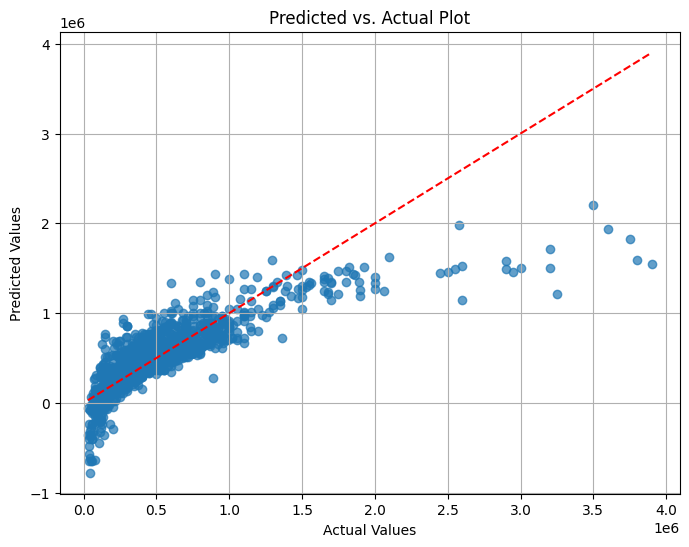

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Plot")
plt.grid(True) #For gridding
plt.show()

###### The scatter shows that the model captures the general relationship between features and prices fairly well meaning the model performs better for average priced cars but struggles with high end cars

### Q38

###### Use GridSearchCV to find the best alpha value for Ridge Regression.
###### Explain what alpha does in Ridge/Lasso regression and why tuning it is important.

In [ ]:
#Use GridSearchCV to find the best alpha value for Ridge Regression.
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
param_grid = {'alpha': [0.1, 1.0, 10, 100,200, 500, 1000]} #testing different alpha values
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train) #fitting the model
print("Best alpha value for Ridge Regression is", grid_search.best_params_['alpha'])

Best alpha value for Ridge Regression is 500


#### What alpha does in ridge and lasso regressions
-what alpha does is that it adds a constraint to the cost function, encouraging the model to stay simple but effective.

##### Why tuning is important.
-why tuning α is important is to prevent the model from “memorizing” features (overfitting) and instead focus on the true underlying relationships.

### Q39

######  Try Polynomial Regression on the dataset.
###### Compare the results with Linear Regression and explain when polynomial regression might be useful.

In [ ]:
#Implementation
#Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
# Load dataset
df = pd.read_csv("cleaned_cars.csv")
df.index = range(1, len(df) + 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6906 entries, 1 to 6906
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          6906 non-null   int64  
 1   name                6906 non-null   object 
 2   selling_price       6906 non-null   int64  
 3   km_driven           6906 non-null   int64  
 4   fuel                6906 non-null   object 
 5   seller_type         6906 non-null   object 
 6   transmission        6906 non-null   object 
 7   owner               6906 non-null   object 
 8   mileage(km/ltr/kg)  6906 non-null   float64
 9   engine              6906 non-null   float64
 10  max_power           6906 non-null   float64
 11  seats               6906 non-null   float64
 12  car_age             6906 non-null   int64  
 13  price_per_km        6906 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 755.5+ KB


In [ ]:
#Defining features and target variable
X= df[['car_age']]
y= df['selling_price']

In [ ]:
#Fitting the model
from sklearn import linear_model

linear_model = LinearRegression()
linear_model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
#Fitting polynomial regression model
from numpy import poly
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(X)
poly.fit(x_poly,y)
linear_model2 = LinearRegression()
linear_model2.fit(x_poly,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


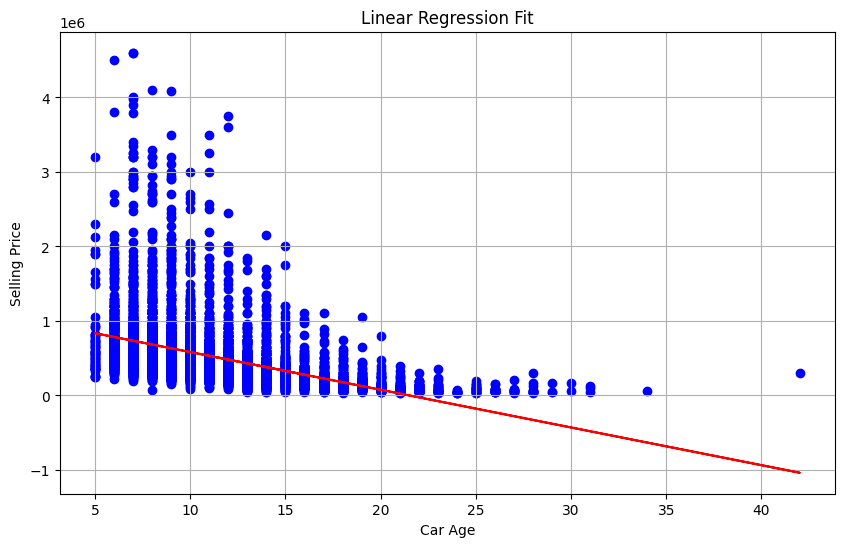

In [ ]:
#Visualize linear regresssion
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
plt.plot(X, linear_model.predict(X), color='red')
plt.title('Linear Regression Fit')
plt.xlabel('Car Age')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

In [ ]:
#Predictions
pred = linear_model.predict(X)
print(pred)


[531466.64051881 531466.64051881 126514.82483469 ... 480847.6635583
 177133.80179521 278371.75571624]


In [ ]:
#Calculating mse and r-squared for linear regression
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, pred)
r2 = r2_score(y, pred)
print(f"mse for linear regression= {mse}")
print("*" * 70)
print(f"r-squared for linear regression= {r2}")
print("*" * 70)

mse for linear regression= 137819298428.58258
**********************************************************************
r-squared for linear regression= 0.23585120969604256
**********************************************************************


###### From the results above, linear regression might be useful here since it's a straight line 

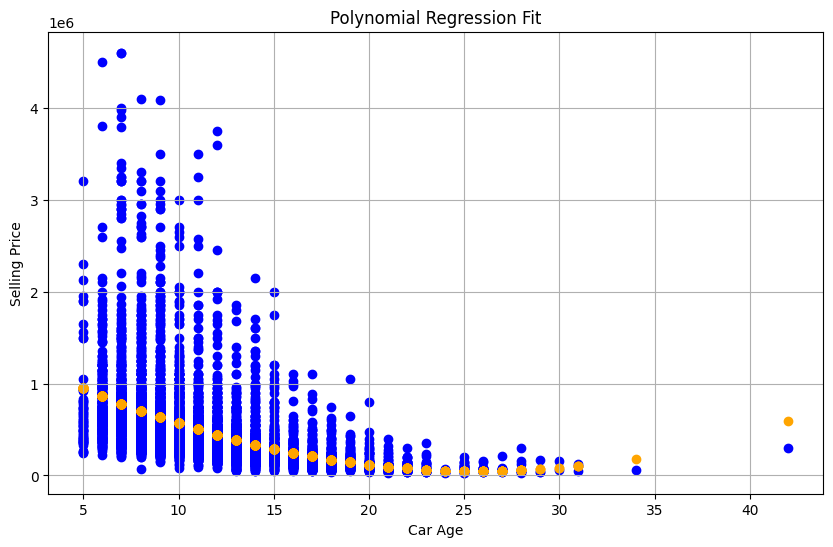

In [ ]:
#Visualize polynomial regression
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
plt.scatter(X, linear_model2.predict(x_poly), color='orange')
plt.title('Polynomial Regression Fit')
plt.xlabel('Car Age')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

In [ ]:
#Getting predictions
predictions = linear_model2.predict(x_poly)
print(predictions)

[502799.52230032 502799.52230032 142557.86599796 ... 443226.32335533
 173045.08112856 246484.93302451]


In [ ]:
#calculating mse & r-squared for polynomial regression
mse_poly = mean_squared_error(y, predictions)
r2_poly = r2_score(y, predictions)
print(f"mse for polynomial regression= {mse_poly}")
print("*" * 70)
print(f"r-squared for polynomial regression= {r2_poly}")
print("*" * 70)

mse for polynomial regression= 134730719053.30165
**********************************************************************
r-squared for polynomial regression= 0.2529760552023611
**********************************************************************


###### From the visual, the polynomial regression is useful since the relationship gives a curved visual.

##### Comparing results
###### Polynomial regression has a much better fit since it has a lower mse and it's R-squared is slightly higher than that of a linear regression making it more closer to 1 and by that, the relationship between variables in non-linear

##### When is polynoimial useful...
-When the relationshipp is non-linear.

-When the model has a curved pattern and linear regression doesn't.

### Q40

###### Summarize your findings:
###### Which model performed best (Linear, Lasso, Ridge, or Polynomial)?
###### Explain why you think it performed better and what you would do next to improve predictions.

##### Polynomial regression performed best because ideally car prices decreases with time but not in a straight line rather than a curved line meaning that depreciation curve was nonlinear